## Simple Linear Regression(SLR)

**Step 1:importing the libraries**



In [110]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures# For polynomial transformation

**Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)**


In [113]:
np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise



In [115]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

**Step 3:Create a linear regression model**


In [29]:
model=LinearRegression()

**Step 4:Train the model** 


In [32]:
model.fit(X,Y)

LinearRegression()

**Step 5:Get the values of slope(m) and intercept(c) from trained model**

In [24]:
#coefficient and intercept
m=model.coef_[0]
print("Slope:",m)
c=model.intercept_
print("Intercept:",c)

Slope: 4.965498141580591
Intercept: 27.430065779800536


**Step 6:Display the equation of the line**

In [26]:
#equation of a straight line
print(f'Equation of a line:Y={m:.2f}X + {c:.2f}')

Equation of a line:Y=4.97X + 27.43


**Step 7:Predict values using the model**

In [37]:
Y_pred=model.predict(X)#Predict salaries for given experience values

## Model_Evaluation_metrics


**1.Mean Squared Error(MSE)-Measures average squared difference between actual and predicted values** 

In [47]:
#It's commonly used when we want to penalize large errors more heavily.
mse=mean_squared_error(Y,Y_pred)
print(f'Mean Squared Error(MSE):{mse:.2f}')

Mean Squared Error(MSE):11.75


**2.Mean Absolute Error(MAE)-Measures average absolute differences between actual and predicted values**

In [56]:
#MAE is often used when you want a metric that treats all errors equally, regardless of their magnitude.
mae=mean_absolute_error(Y,Y_pred)
print(f'Mean Absolute Error(MSE):{mae:.2f}')

Mean Absolute Error(MSE):2.87


**3.Root Mean Squared Error(RMSE)-Measures the standard deviation of residuals(errors)**

In [59]:
#RMSE is interpretable measure of prediction error in the same units as the original data
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error(RMSE):{rmse:.2f}')

Root Mean Squared Error(RMSE):3.43


**4.R-Square(R²)-Represents how well the model fits the data(0 to 1,where 1 is best)**

In [71]:
#It used for measuring accuracies it doesnot look for dependancies(predictores) it just finds the precision
r2=r2_score(Y,Y_pred)
print(f'R-Squared(R²):{r2:.2f}')

R-Squared(R²):0.95


**5.adjusted R-Squared(R²_adj)-adjusted for the number of predictors,better for multiple regression**

In [68]:
n=len(Y)#Number of observations
p=1#number of independent variables(Experience)
adj_r2=1 - ((1 - r2) * (n-1)/(n-p-1))
print(f'Adjusted R-squared:{adj_r2:.2f}')

Adjusted R-squared:0.94


**6.OLS(Ordinary Least Squares)**

In [119]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     138.5
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           2.49e-06
Time:                        12:32:04   Log-Likelihood:                -26.509
No. Observations:                  10   AIC:                             57.02
Df Residuals:                       8   BIC:                             57.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4301     

C:\Users\Proxy1\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


**Step 8:Plot the actual data points**

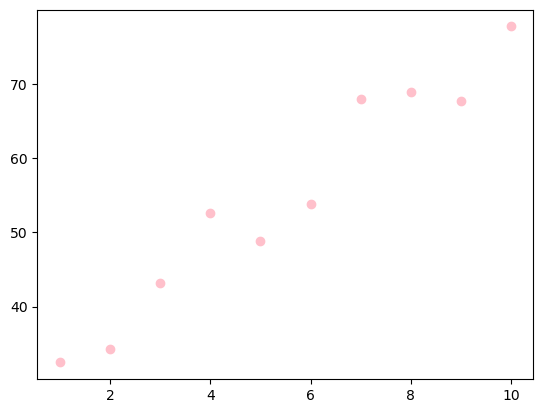

In [77]:
plt.scatter(X,Y,color='pink',label='Actual Data')

**Step 9:Plot the Regression Line(Best Fit Line)**

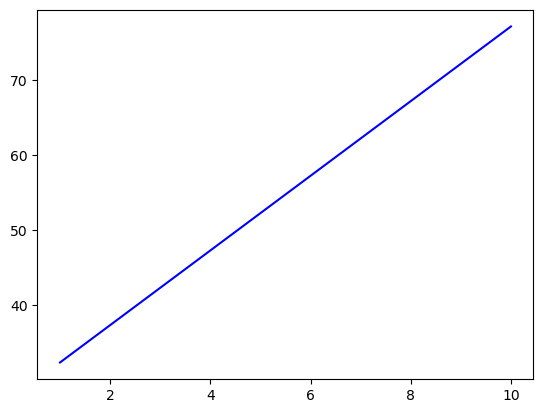

In [83]:
plt.plot(X,Y_pred,color='blue',label='Best Fit Line')#Regression Line

**Step 10:Add labels and legend**

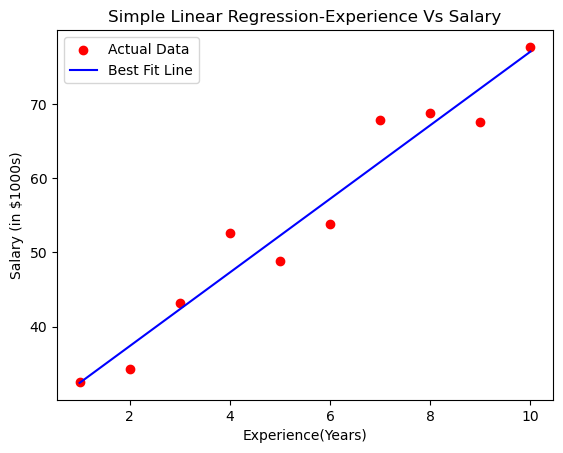

In [98]:
#Again fo this first 2 steps for getting the graph
plt.scatter(X,Y,color='red',label='Actual Data')
plt.plot(X,Y_pred,color='blue',label='Best Fit Line')#Regression Line
plt.xlabel('Experience(Years)')#Label for X-axis
plt.ylabel('Salary (in $1000s)')#Label for Y-axis
plt.title('Simple Linear Regression-Experience Vs Salary')#Title of the plot
plt.legend()#Show legend
#Step 11:Display the graph
plt.show()

In [106]:
#User can input experience, and the model will predict the salary
while True:
    try:
        exp=float(input('\nEnter years of experience to predict salary(or -1 to exit):'))
        if exp==-1:
            break #Exit the loop
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f'Predicted salary for {exp} years of experience: ${predicted_salary:.2f}K')
    except ValueError:
        print('Please enter a valid number!')


Enter years of experience to predict salary(or -1 to exit): 75


Predicted salary for 75.0 years of experience: $399.84K



Enter years of experience to predict salary(or -1 to exit): -1


In [ ]:
#Step 1:Importing the libraries
#Step 2: Define the dataset
#Step 3:Create a linear regression model
#Step 4:Train the model
#Step 5:Get the values of slope(m) and intercept(c) from trained model
#Step 6:Display the equation of the line
#Step 7:Predict values using the model
#Step 8:Plot the Linear Regression Line
#Step 9:Prediction Features